In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

df = pd.read_csv('kc_house_data_train.csv', index_col=0)


In [2]:
df.bedrooms.describe()

count    17290.000000
mean         3.372470
std          0.939346
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [3]:
# Changing grade column into categorical variable
ratings = list(df['grade'].unique())
unrated = [4,5,6,8,9,10]
rated = [x for x in ratings if x not in unrated]
unrated_dict = dict.fromkeys(unrated, 'unrated')
rated_dict  = dict(zip(rated, rated))
ratings_map = {**rated_dict,**unrated_dict}
df['construction_grade'] = df['grade'].map(ratings_map)
df.replace({'construction_grade': {7: 'average', 1: 'falls short', 3: 'falls short', 11: 'high quality', 12: 'high quality', 13: 'high quality'}},inplace=True)


In [4]:
df = pd.get_dummies(df, columns=['construction_grade','zipcode','waterfront'], drop_first=True)
df['date'] = pd.to_datetime(df['date'])
# df['date'] = df['date'].astype('str') 
# df["date"]= df["date"].str.split("T", n = 1, expand = True) 
df['yr_old'] =  df['yr_built'].map(lambda x: 2020-x )
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15',
       'construction_grade_falls short', 'construction_grade_high quality',
       'construction_grade_unrated', 'waterfront_1',
        'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199', 'yr_old']
df_features = df[features]
target = df['price']

In [5]:
df.bedrooms.describe()

count    17290.000000
mean         3.372470
std          0.939346
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [6]:
df.sqft_lot.describe()

count    1.729000e+04
mean     1.524340e+04
std      4.230462e+04
min      5.720000e+02
25%      5.081250e+03
50%      7.642000e+03
75%      1.072575e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [7]:
sqftlot_90p = df.sqft_lot.quantile(0.90)
sqftlot_90p

21738.600000000002

In [8]:
df.sqft_lot = df.sqft_lot.where(df['sqft_lot'] != df['sqft_lot'].max(), sqftlot_90p) 
df.sqft_lot.describe()

count    1.729000e+04
mean     1.514915e+04
std      4.043320e+04
min      5.720000e+02
25%      5.081250e+03
50%      7.642000e+03
75%      1.072575e+04
max      1.164794e+06
Name: sqft_lot, dtype: float64

In [9]:
df.bedrooms.describe()

count    17290.000000
mean         3.372470
std          0.939346
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [11]:
bedrooms_90p = df.bedrooms.quantile(0.90)
bedrooms_90p

4.0

In [12]:
df.bedrooms = df.bedrooms.where(df['bedrooms'] != df['bedrooms'].max(), bedrooms_90p)

In [13]:
df.bedrooms.describe()

count    17290.000000
mean         3.370792
std          0.911931
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=35,test_size=0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 89) Target:  (13832,)
Training set - Features:  (3458, 89) Target:  (3458,)


Now that I have my training and testing datasets, I am going to apply my feature scaler to the dataset.  

**Why amy I sacling my data after the train-test split and not before?**

In [73]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [74]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 162707.54592972042


### Evaluate on the test set

In [75]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 163926.3256766608
Training:  162707 vs. Testing:  163926


***Plot the residuals after fitting a linear model***

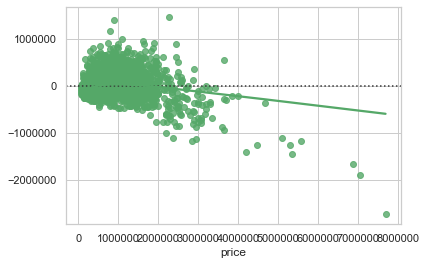

In [76]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

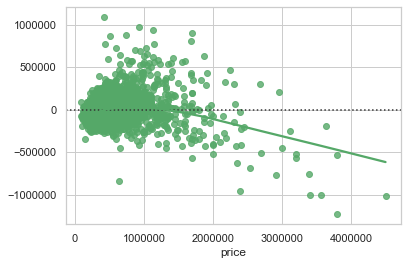

In [77]:
sns.residplot( y_test, y_pred, lowess=True, color="g")

**Take the square root of the target data to determine if this model is more accurate**

In [78]:
#take the natural log of the target variable
y_log = np.log(y_train)

In [79]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

y_train_pred = lm_log.predict(X_train)

#exponentiate the predictions to get them on the same original scale 
y_train_pred = np.exp(y_train_pred)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 213718.87166513558


## Use the new model to predict the test set.

In [80]:
y_test_pred = lm_log.predict(X_test)


#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 147612.55792393023
Training:  213718 vs. Testing:  147612


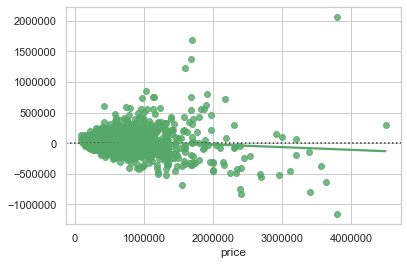

In [81]:
sns.residplot( y_test, y_test_pred, lowess=True, color="g")

## Generate Polynomial and Interaction features

In [60]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,construction_grade_falls short,construction_grade_high quality,construction_grade_unrated,waterfront_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,yr_old,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms view,bedrooms condition,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_built,bedrooms yr_renovated,bedrooms lat,bedrooms long,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms construction_grade_falls short,bedrooms construction_grade_high quality,bedrooms construction_grade_unrated,bedrooms waterfront_1,bedrooms zipcode_98002,bedrooms zipcode_98003,bedrooms zipcode_98004,bedrooms zipcode_98005,bedrooms zipcode_98006,bedrooms zipcode_98007,bedrooms zipcode_98008,bedrooms zipcode_98010,bedrooms zipcode_98011,bedrooms zipcode_98014,bedrooms zipcode_98019,bedrooms zipcode_98022,bedrooms zipcode_98023,bedrooms zipcode_98024,bedrooms zipcode_98027,bedrooms zipcode_98028,bedrooms zipcode_98029,bedrooms zipcode_98030,bedrooms zipcode_98031,bedrooms zipcode_98032,bedrooms zipcode_98033,bedrooms zipcode_98034,bedrooms zipcode_98038,bedrooms zipcode_98039,bedrooms zipcode_98040,bedrooms zipcode_98042,bedrooms zipcode_98045,bedrooms zipcode_98052,bedrooms zipcode_98053,bedrooms zipcode_98055,bedrooms zipcode_98056,bedrooms zipcode_98058,bedrooms zipcode_98059,bedrooms zipcode_98065,bedrooms zipcode_98070,bedrooms zipcode_98072,bedrooms zipcode_98074,bedrooms zipcode_98075,bedrooms zipcode_98077,bedrooms zipcode_98092,bedrooms zipcode_98102,bedrooms zipcode_98103,...,zipcode_98122 zipcode_98133,zipcode_98122 zipcode_98136,zipcode_98122 zipcode_98144,zipcode_98122 zipcode_98146,zipcode_98122 zipcode_98148,zipcode_98122 zipcode_98155,zipcode_98122 zipcode_98166,zipcode_98122 zipcode_98168,zipcode_98122 zipcode_98177,zipcode_98122 zipcode_98178,zipcode_98122 zipcode_98188,zipcode_98122 zipcode_98198,zipcode_98122 zipcode_98199,zipcode_98122 yr_old,zipcode_98125^2,zipcode_98125 zipcode_98126,zipcode_98125 zipcode_98133,zipcode_98125 zipcode_98136,zipcode_98125 zipcode_98144,zipcode_98125 zipcode_98146,zipcode_98125 zipcode_98148,zipcode_98125 zipcode_98155,zipcode_98125 zipcode_98166,zipcode_98125 zipcode_98168,zipcode_98125 zipcode_98177,zipcode_98125 zipcode_98178,zipcode_98125 zipcode_98188,zipcode_98125 zipcode_98198,zipcode_98125 zipcode_98199,zipcode_98125 yr_old,zipcode_98126^2,zipcode_98126 zipcode_98133,zipcode_98126 zipcode_98136,zipcode_98126 zipcode_98144,zipcode_98126 zipcode_98146,zipcode_98126 zipcode_98148,zipcode_98126 zipcode_98155,zipcode_98126 zipcode_98166,zipcode_98126 zipcode_98168,zipcode_98126 zipcode_98177,zipcode_98126 zipcode_98178,zipcode_98126 zipcode_98188,zipcode_98126 zipcode_98198,zipcode_98126 zipcode_98199,zipcode_98126 yr_old,zipcode_98133^2,zipcode_98133 zipcode_98136,zipcode_98133 zipcode_98144,zipcode_98133 zipcode_98146,zipcode_98133 zipcode_98148,zipcode_98133 zipcode_98155,zipcode_98133 zipcode_98166,z

In [61]:
df_poly2.shape

(17290, 4094)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=33,test_size=0.2)


In [69]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [70]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print("R^2: ", lm_2.score(df_poly2, target))
print('Training Root Mean Squared Error:' , train_rmse)

R^2:  -6.870604430647691e+36
Training Root Mean Squared Error: 93120.42438703295


In [71]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
# TRAINING ERROR SHOULD BE LOWER THAN TESTING ERROR

Testing Root Mean Squared Error: 5.353564263668028e+16
Training:  93120 vs. Testing:  53535642636680280


# Filter Methods
Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

In [24]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [25]:
len(X_train.columns)

89

In [26]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train.drop(columns=to_drop, inplace=False)
X_test.drop(columns=to_drop, inplace=False)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,construction_grade_falls short,construction_grade_high quality,construction_grade_unrated,waterfront_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.715481,-0.145361,0.215857,-0.230470,-0.907216,-0.304577,0.907723,-0.783327,1.916196,-0.671403,-0.209199,0.048259,-1.256681,-0.305989,-0.260001,-0.012026,-0.153399,0.880299,-0.089943,-0.093549,-0.117067,-0.116749,-0.090757,-0.15216,-0.084037,-0.114825,-0.064327,-0.100753,-0.073836,-0.093549,-0.104352,-0.152656,-0.06202,-0.142952,-0.11547,-0.118956,-0.108179,-0.109877,-0.080474,-0.144524,-0.163469,-0.165093,-0.04964,-0.118643,-0.159462,-0.100386,-0.167846,-0.140564,-0.108861,-0.142424,-0.150158,-0.148387,-0.120509,-0.076749,-0.110883,-0.146338,-0.131181,-0.097026,-0.130895,-0.070288,-0.1683,-0.102568,-0.126542,-0.108179,-0.094722,-0.069242,-0.116431,-0.163702,8.173367,-0.161594,-0.158026,-0.095109,-0.116749,-0.13949,-0.126837,-0.150661,-0.113526,-0.121125,-0.117067,-0.052486,-0.141364,-0.107493,-0.111881,-0.112542,-0.109201,-0.081379,-0.110883,-0.123259
1,-0.391568,0.179249,0.041629,-0.286552,0.960137,-0.304577,-0.628885,0.400096,-0.663148,1.064768,-0.209199,-1.619819,0.311914,0.629277,-0.344874,-0.012026,-0.153399,-1.135978,-0.089943,-0.093549,-0.117067,-0.116749,-0.090757,-0.15216,-0.084037,-0.114825,-0.064327,-0.100753,-0.073836,-0.093549,-0.104352,-0.152656,-0.06202,-0.142952,-0.11547,-0.118956,-0.108179,-0.109877,-0.080474,-0.144524,-0.163469,-0.165093,-0.04964,-0.118643,-0.159462,-0.100386,-0.167846,-0.140564,-0.108861,-0.142424,-0.150158,-0.148387,-0.120509,-0.076749,-0.110883,-0.146338,-0.131181,-0.097026,7.639686,-0.070288,-0.1683,-0.102568,-0.126542,-0.108179,-0.094722,-0.069242,-0.116431,-0.163702,-0.122349,-0.161594,-0.158026,-0.095109,-0.116749,-0.13949,-0.126837,-0.150661,-0.113526,-0.121125,-0.117067,-0.052486,-0.141364,-0.107493,-0.111881,-0.112542,-0.109201,-0.081379,-0.110883,-0.123259
2,-0.391568,-0.794582,-0.383054,-0.230470,-0.907216,-0.304577,-0.628885,-0.650493,0.422891,-0.807573,-0.209199,0.028745,-1.306590,-0.905143,-0.260001,-0.012026,-0.153399,-1.135978,-0.089943,-0.093549,-0.117067,-0.116749,-0.090757,-0.15216,-0.084037,-0.114825,-0.064327,-0.100753,-0.073836,-0.093549,-0.104352,-0.152656,-0.06202,-0.142952,-0.11547,-0.118956,-0.108179,-0.109877,-0.080474,-0.144524,-0.163469,-0.165093,-0.04964,-0.118643,-0.159462,-0.100386,-0.167846,-0.140564,-0.108861,-0.142424,-0.150158,-0.148387,-0.120509,-0.076749,-0.110883,-0.146338,-0.131181,-0.097026,-0.130895,-0.070288,-0.1683,-0.102568,-0.126542,-0.108179,-0.094722,-0.069242,-0.116431,-0.163702,8.173367,-0.161594,-0.158026,-0.095109,-0.116749,-0.13949,-0.126837,-0.150661,-0.113526,-0.121125,-0.117067,-0.052486,-0.141364,-0.107493,-0.111881,-0.112542,-0.109201,-0.081379,-0.110883,-0.123259
3,-0.391568,0.503860,-0.372164,-0.241997,0.960137,-0.304577,-0.628885,-0.058782,-0.663148,0.962640,-0.209199,-1.321329,1.360020,0.278552,-0.287088,-0.012026,-0.153399,-1.135978,-0.

In [27]:
to_drop

['yr_old']

## Variance Inflation Factor (VIF) 

VIFis a measure of colinearity among predictor variables within a multiple regression. The variance inflation factor for the estimated regression coefficient $b_j$ — denoted $VIF_j$ —is just the factor by which the variance of $b_j$ is "inflated" by the existence of correlation among the predictor variables in the model.In particular, the variance inflation factor for the jth predictor is:

$$VIF_j=\frac{1}{1-R_{j}^{2}}$$


where $R^2_j$  is the $R^2$-value obtained by regressing the jth predictor on the remaining predictors. 


Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

https://online.stat.psu.edu/stat462/node/180/

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[1.6928689939970551,
 3.431784521331494,
 inf,
 2.0761562184253086,
 2.4492179612586376,
 1.5142836213902673,
 1.3126640242026761,
 inf,
 inf,
 inf,
 1.164217049602737,
 63.78569145390358,
 34.66651416674671,
 3.090900758844094,
 2.197462043998762,
 1.0157663762982578,
 1.5282204819481122,
 1.3405832444678207,
 1.263268427730341,
 1.5815806650849231,
 1.851646879531246,
 6.17524010235493,
 4.2085506725791655,
 7.806395028676149,
 3.845711322669024,
 6.47172489887379,
 1.7783583073036802,
 8.40905138228176,
 5.693697157471931,
 8.623070678243309,
 3.311429388192667,
 2.7214686338989145,
 3.063108772933489,
 7.358313099886119,
 10.457783118318414,
 6.791498156750546,
 1.982675388946976,
 2.2463207176720577,
 1.4780671730942385,
 11.93398683046302,
 17.276099754304553,
 5.644287087273416,
 2.00684487503312,
 4.87417913431487,
 3.8571569609466834,
 7.317840345042703,
 16.497986557279276,
 13.570327337075165,
 2.6996349902911123,
 5.198601654756055,
 4.369111569894287,
 5.4968655987465445,


In [30]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_features.columns
vif.round(1)
# DO THIS BEFORE POLYNOMIAL AND INTERACTION

,VIF Factor,features
0,1.7,bedrooms
1,3.4,bathrooms
2,inf,sqft_living
3,2.0,sqft_lot
4,2.5,floors
5,1.5,view
6,1.3,condition
7,inf,sqft_above
8,inf,sqft_basement
9,29357047.0,yr_built


In [31]:
df_features.corrwith(target).abs()

bedrooms                           0.305106
bathrooms                          0.524335
sqft_living                        0.703540
sqft_lot                           0.086803
floors                             0.256985
view                               0.395485
condition                          0.036099
sqft_above                         0.607760
sqft_basement                      0.323312
yr_built                           0.056450
yr_renovated                       0.117770
lat                                0.302394
long                               0.019327
sqft_living15                      0.585567
sqft_lot15                         0.081423
construction_grade_falls short     0.013447
construction_grade_high quality    0.487650
construction_grade_unrated         0.162221
waterfront_1                       0.275779
zipcode_98002                      0.079096
zipcode_98003                      0.076717
zipcode_98004                      0.270366
zipcode_98005                   

###  F Test

F Test is a statistical test used to compare between models and check if the difference is significant between the model.

F-Test does a hypothesis testing model X and Y where X is a model created by just a constant and Y is the model created by a constant and a feature.

The least square errors in both the models are compared and checks if the difference in errors between model X and Y are significant or introduced by chance.

F-Test is useful in feature selection as we get to know the significance of each feature in improving the model.

Scikit learn provides the Selecting K best features using F-Test.

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=15)
#run regression on x train and y train and return top 15 features
selector.fit(X_train, y_train)

SelectKBest(k=15, score_func=<function f_regression at 0x1a2b3317b8>)

In [33]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [34]:
list(removed_columns)

['sqft_lot',
 'condition',
 'yr_built',
 'yr_renovated',
 'long',
 'sqft_lot15',
 'construction_grade_falls short',
 'construction_grade_unrated',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipco

In [35]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'view',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15',
 'construction_grade_high quality',
 'waterfront_1',
 'zipcode_98004',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98112']

In [36]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

Training Root Mean Squared Error: 189812.49206658825
Testing Root Mean Squared Error: 190813.31549051605
Original:  154234.96039325531 vs. KBest:  190813.31549051605


# Wrapper Methods

Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model is used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

Wrapper Methods promises you a best set of features with a extensive greedy search.

But the main drawbacks of wrapper methods is the sheer amount of models that needs to be trained. It is computationally very expensive and is infeasible with large number of features.


In [37]:
from sklearn.feature_selection import RFECV

In [38]:
ols = linear_model.LinearRegression()

In [39]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [40]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]



In [41]:
list(removed_rfe)

['bathrooms',
 'sqft_lot',
 'floors',
 'yr_built',
 'yr_renovated',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'construction_grade_falls short',
 'construction_grade_unrated',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98005',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98106',
 'zipcode_98108',
 'zipcode_98118',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98136',
 'zipcode_98146',
 'zipcode_98148',
 'zipcode_98155',
 'zipcode_9816

In [42]:
len(list(selected_rfe))

27

In [43]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 170576.68950821395
Testing Root Mean Squared Error: 173088.7101144982
Original:  154234.96039325531 vs. KBest:  190813.31549051605 vs. RFE:  173088.7101144982


# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

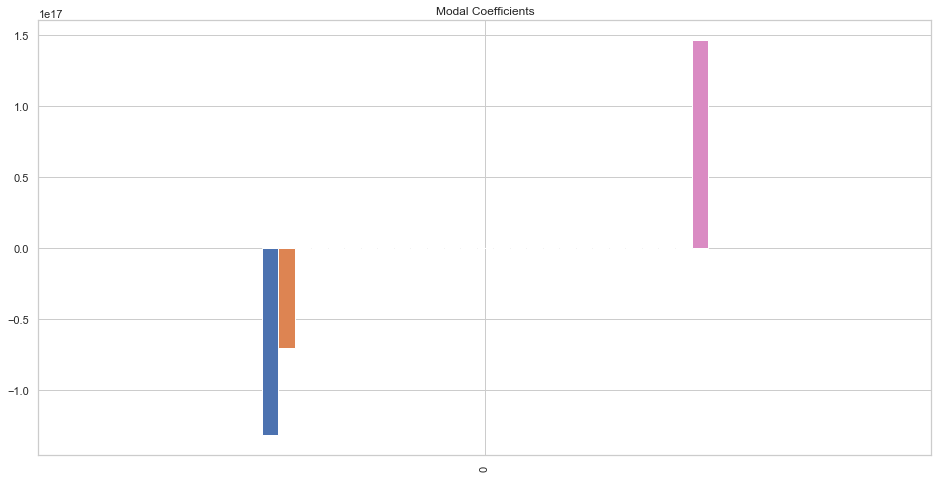

In [44]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [45]:
coef.T

,0
bedrooms,-2.172530e+04
sqft_living,1.463210e+17
view,4.901084e+04
condition,2.205157e+04
sqft_above,-1.319448e+17
sqft_basement,-7.042093e+16
lat,6.827915e+04
construction_grade_high quality,5.511246e+04
waterfront_1,5.909865e+04
zipcode_98004,7.238426e+04


In [46]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )



Training Error: 95007.60520682938
Testing Error: 164727.63781620213


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177764950050613.3, tolerance: 191874925316.00372
  positive)


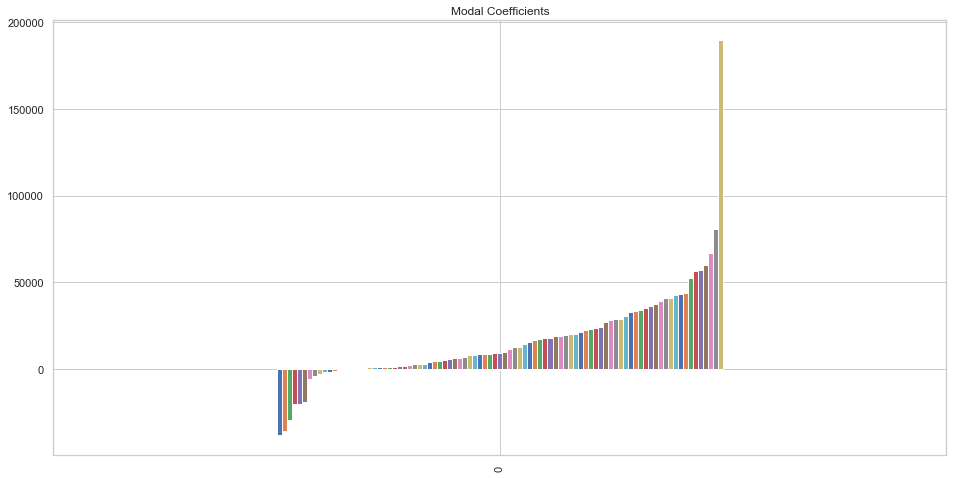

In [47]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [48]:
lasso_coef01.T

,0
yr_built,-38105.744662
yr_old,-35751.707703
sqft_basement,-29338.302796
floors,-20082.877355
bedrooms,-20018.433457
long,-18937.664585
zipcode_98023,-5478.918448
zipcode_98070,-4050.797667
zipcode_98198,-2951.084964
zipcode_98003,-1661.509301


In [49]:
## training the model
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train,y_train)

y_train_lasso1 = lasso1.predict(X_train)
y_pred_lasso1 = lasso1.predict(X_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )


Training Error: 95007.58068919025
Testing Error: 164727.86500190196


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158642548803848.5, tolerance: 191874925316.00372
  positive)


In [50]:
lasso_coef1 = pd.DataFrame(data=lasso1.coef_).T
lasso_coef1.columns = X_train.columns

In [51]:
lasso_coef1.T

,0
bedrooms,-20018.447963
bathrooms,19252.697168
sqft_living,189482.004312
sqft_lot,9106.143281
floors,-20081.370346
view,43077.855674
condition,20358.016955
sqft_above,10153.397252
sqft_basement,-29313.505752
yr_built,-37926.461459


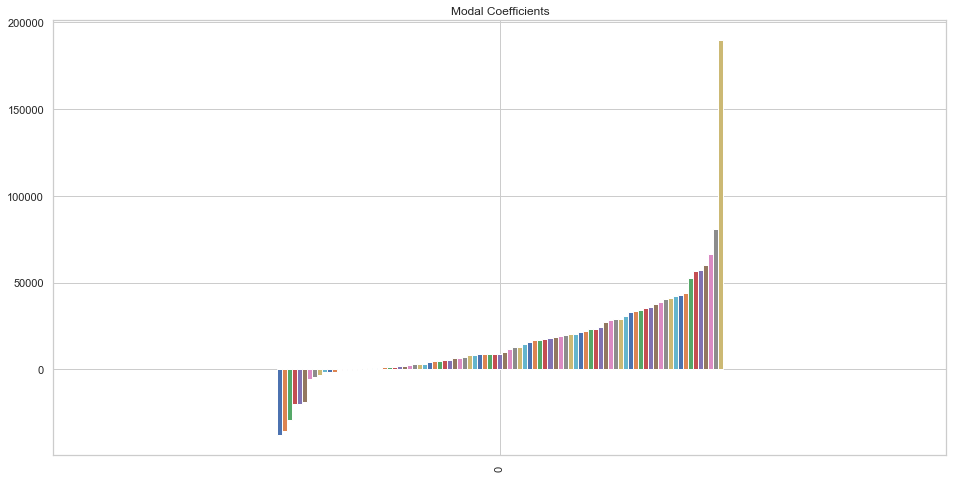

In [52]:

lasso_coef1 = lasso_coef1.T.sort_values(by=0).T
lasso_coef1.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))